In [140]:
import matplotlib.pyplot as plt
import numpy as np


In [115]:
# Raw
# 2241 111132121111112631141124111131113612114111 1112 111211222632421512112111363241111411111211 1126 
# 1112 111211222632421512112111363241111411111211 1126 122421141112122126111152241221211126121511 1141
# 1126 122421141112122126111152241221211126121511 1141 222123612242241221211126113411114111112121 1161
# 1141 222123612242241221211126113411114111112121 1161 215112411121223612151341112212126121111222 4121
# 1161 215112411121223612151341112212126121111222 4121 11221263152114111221113611342242122211261224 2114

# Merged
msgs = [
    "2241111132121111112631141124111131113612114111",
    "11121112112226324215121121113632411114111112111126",
    "1224211411121221261111522412212111261215111141",
    "2221236122422412212111261134111141111121211161",
    "2151124111212236121513411122121261211112224121",
    "112212631521141112211136113422421222112612242114"
]


# Split on 6 (SO6)

In [121]:
msgs_s6 = "".join(msgs).split("6")
msgs_s6_lengths = [ sum([ int(x) for x in msg ]) for msg in msgs_s6 ]

print(f"{len(msgs_s6)} messages")
print(f"lengths={msgs_s6_lengths}\n")
for msg_len, msg in zip(msgs_s6_lengths, msgs_s6):
    print(f"{msg_len}\t {msg}")


16 messages
lengths=[29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 17]

29	 2241111132121111112
30	 31141124111131113
30	 121141111112111211222
30	 324215121121113
30	 3241111411111211112
30	 12242114111212212
30	 11115224122121112
30	 1215111141222123
30	 1224224122121112
30	 11341111411111212111
30	 1215112411121223
30	 1215134111221212
30	 1211112224121112212
30	 3152114111221113
30	 113422421222112
17	 12242114


# Split on 4 (SO4)

In [124]:
msgs_s4 = "".join(msgs).split("4")
msgs_s4_lengths = [ sum([ int(x) for x in msg ]) for msg in msgs_s4 ]

print(f"{len(msgs_s4)} messages")
print(f"lengths={msgs_s4_lengths}\n")
for msg_len, msg in zip(msgs_s4_lengths, msgs_s4):
    print(f"{msg_len}\t {msg}")


24 messages
lengths=[4, 32, 4, 24, 32, 32, 4, 24, 4, 32, 32, 24, 4, 24, 4, 32, 32, 32, 32, 24, 4, 24, 4, 0]

4	 22
32	 11111321211111126311
4	 112
24	 11113111361211
32	 1111112111211222632
32	 215121121113632
4	 1111
24	 111112111126122
4	 211
32	 11121221261111522
32	 122121112612151111
24	 12221236122
4	 22
24	 1221211126113
4	 1111
32	 1111121211161215112
32	 111212236121513
32	 1112212126121111222
32	 1211122126315211
24	 1112211136113
4	 22
24	 212221126122
4	 211
0	 


# Semi RLE using SO6

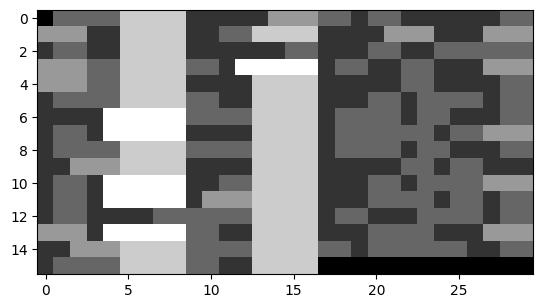

In [88]:
def semi_rl_encode(msg):
    return "".join([ c * int(c) for c in msg ])

msgs_s6_srle = [ semi_rl_encode(msg) for msg in msgs_s6 ]

im_s6_srle = [ [ int(c) for c in msg ] for msg in msgs_s6_srle ]
im_s6_srle[0] = [0] + im_s6_srle[0]
im_s6_srle[-1] = im_s6_srle[-1] + [0] * 13
plt.imshow(im_s6_srle, cmap="gray")
plt.show()

# RLE using SO6

RL decode on SO6


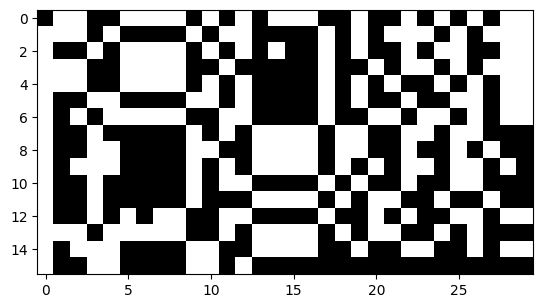

RL decode on SO6 (no reset)


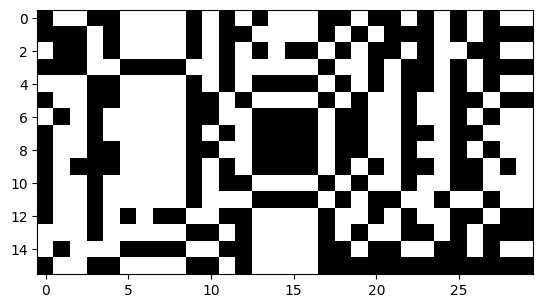

In [91]:
flip = 1

def rl_decode(msg, reset=True):
    global flip
    if reset: flip = 1
    out = ""
    for c in msg:
        out += int(c) * str(flip)
        flip = 1 - flip
    return out

print("RL decode on SO6")

msgs_s6_rle = [ rl_decode(msg) for msg in msgs_s6 ]
im_s6_rle = [ [ int(c) for c in msg ] for msg in msgs_s6_rle ]
im_s6_rle[0] = [0] + im_s6_rle[0]
im_s6_rle[-1] = im_s6_rle[-1] + [0] * 13

plt.imshow(im_s6_rle, cmap="gray")
plt.show()

print("RL decode on SO6 (no reset)")

msgs_s6_rle2 = [ rl_decode(msg, False) for msg in msgs_s6 ]
im_s6_rle2 = [ [ int(c) for c in msg ] for msg in msgs_s6_rle2 ]
im_s6_rle2[0] = [0] + im_s6_rle2[0]
im_s6_rle2[-1] = im_s6_rle2[-1] + [0] * 13

plt.imshow(im_s6_rle2, cmap="gray")
plt.show()


# Split every 36 on SRLE

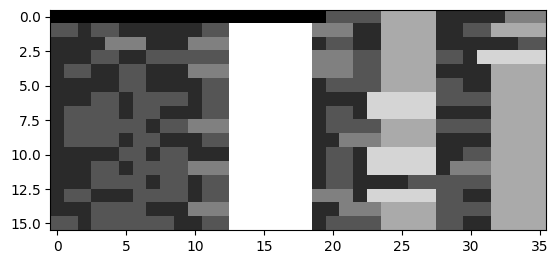

In [167]:
msgs_flat = "".join(msgs).replace("6", "8")
msgs_flat = "".join(msgs)
msgs_flat_srle = semi_rl_encode(msgs_flat)

wrap = 36
leftover = wrap - (len(msgs_flat_srle) % wrap)
msgs_flat_srle_pad = "0" * leftover + msgs_flat_srle
msgs_flat_srle_pad_split = [ msgs_flat_srle_pad[i:i+wrap] for i in range(0, len(msgs_flat_srle_pad), wrap) ]
msgs_s38 = [ [ int(c) for c in msg ] for msg in msgs_flat_srle_pad_split ]

plt.imshow(msgs_s38, cmap="gray")
plt.show()


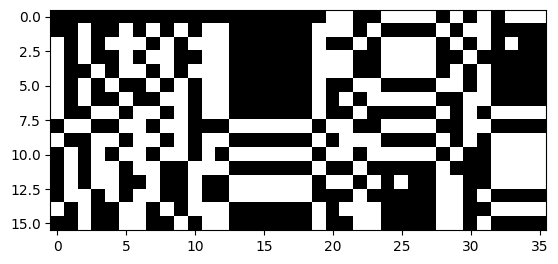

In [169]:
msgs_flat_rle = rl_decode(msgs_flat, True)

wrap = 36
leftover = wrap - (len(msgs_flat_rle) % wrap)
msgs_flat_rle_pad = "0" * leftover + msgs_flat_rle
msgs_flat_rle_pad_split = [ msgs_flat_rle_pad[i:i+wrap] for i in range(0, len(msgs_flat_rle_pad), wrap) ]
msgs_s38 = [ [ int(c) for c in msg ] for msg in msgs_flat_rle_pad_split ]

plt.imshow(msgs_s38, cmap="gray")
plt.show()


# Other

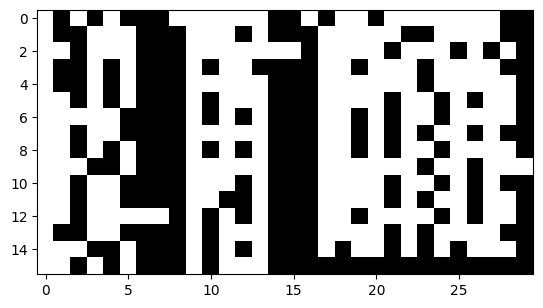

In [146]:
def funkyN(msg):
    return "".join([ ("1" + ("0" * (int(c) - 1))) for c in msg ])

msgs_s6_funkyn = [ funkyN(msg) for msg in msgs_s6 ]

mx = max([ len(msg) for msg in msgs_s6_funkyn ])
im_s6_funkyn = [ [ int(c) for c in msg ] + [0] * (mx - len(msg)) for msg in msgs_s6_funkyn ]
plt.imshow(im_s6_funkyn, cmap="gray")
plt.show()
